# Importing the Required Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

Loading the dataset into memory as a DataFrame object for further processing and analysis.

In [2]:
df = pd.read_csv('D:\MyPythonStuff_Datasets\Crop_Yield_Prediction\Crop_Yield_Prediction.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


I am creating a Machine Learning model that is capable of predicting the crop yield according to the specific climatic conditions and the soil nutrient levels.

Features:

- Nitrogen - ratio of Nitrogen content in soil 
- Phosphorus - ratio of Phosphorus content in soil
- Potassium - ratio of Potassium content in soil
- Temperature - temperature in degree Celsius
- Humidity - relative humidity in %
- pH_Value - pH value of the soil
- Rainfall - rainfall in mm

# Analysing the Data

In [3]:
df.head()
# shows the first 5 rows of the dataframe.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [4]:
df.tail()
# shows the last 5 rows of the dataframe.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [5]:
df.shape
# shows the total number of (rows, columns) in the dataframe.

(2200, 9)

In [6]:
df.columns
# shows the column names of the dataframe. 

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Yield'],
      dtype='object')

In [7]:
df.duplicated().sum()
# first identifies rows that are duplicates based on all columns in the dataframe and then sums up the count of such rows.
# True as 1 and False as 0

0

In [8]:
df.isnull().sum()
# first checks for NaN values in each cell of the dataframe and then sums up the count of such missing values for each column.
# True as 1 and False as 0

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [9]:
df.info()
# shows the summary information about the dataframe.
# quick way to understand the structure of data, check for missing values, and see the data types of columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [10]:
df.describe()
# generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
# This includes count, mean, standard deviation, minimum, maximum, and percentiles (25,50,75).

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [11]:
df.nunique()
# counts the number of unique elements in a dataframe.

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
Yield           502
dtype: int64

In [12]:
df['Crop'].unique()
# finds the unique values in a specific column named 'Crop' in the dataframe.

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [13]:
df['Crop'].value_counts()
# counts the occurrences of each unique value in a specific column named 'Crop' in the dataframe.

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64

In [14]:
crop_summary = pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary
# creates a summary table from a dataframe.
# it aggregates data based on 'Crop' and calculates summary statistics using mean for different features in the dataframe.

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [15]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new
# sets default integer index and the 'Crop' column as a regular column.

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


# Data Visualisation

In [16]:
df1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
# creates a new dataframe named df1 by selecting specific columns.

BOX PLOT
- A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. 
- It consists of a "box" that represents the interquartile range (IQR) containing the middle 50% of the data, with a line inside the box representing the median. 
- "Whiskers" extend from the box to the minimum and maximum values within a specified range, often defined by a statistical criterion. 
- Outliers may also be displayed as individual points beyond the whiskers.

Uses:
- Visual Summary: Provides a concise visual summary of the data's distribution, central tendency, and spread.
- Comparison: Facilitates easy comparison of distributions between different groups or categories within a dataset.
- Identification of Outliers: Helps in identifying potential outliers and extreme values in the dataset.
- Robustness: Is robust to skewed data and does not rely heavily on assumptions about the data's underlying distribution.
- Communicate Insights: Effectively communicates key insights and patterns in the data, making it suitable for presentations and reports.

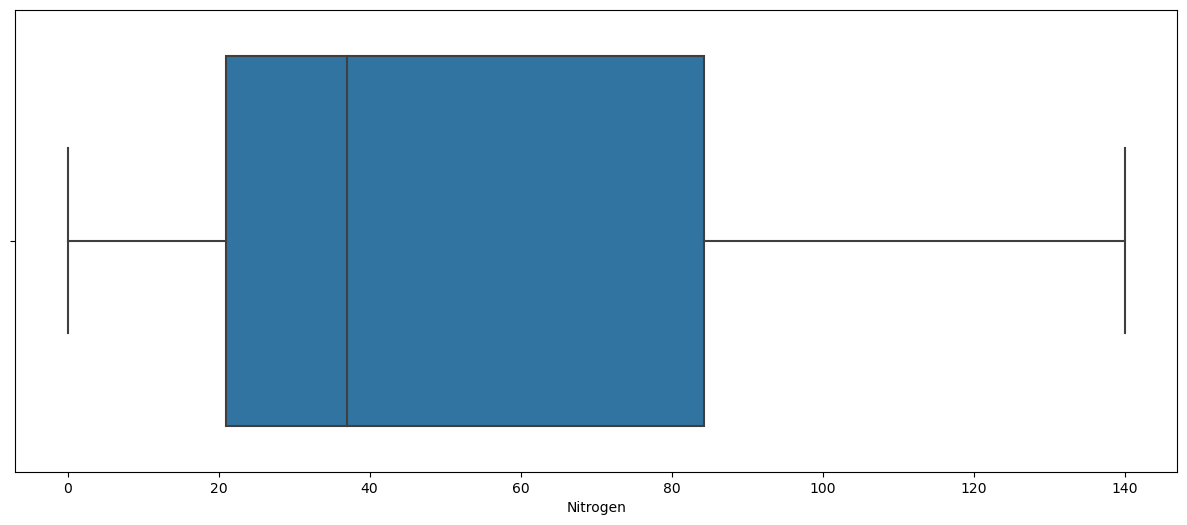

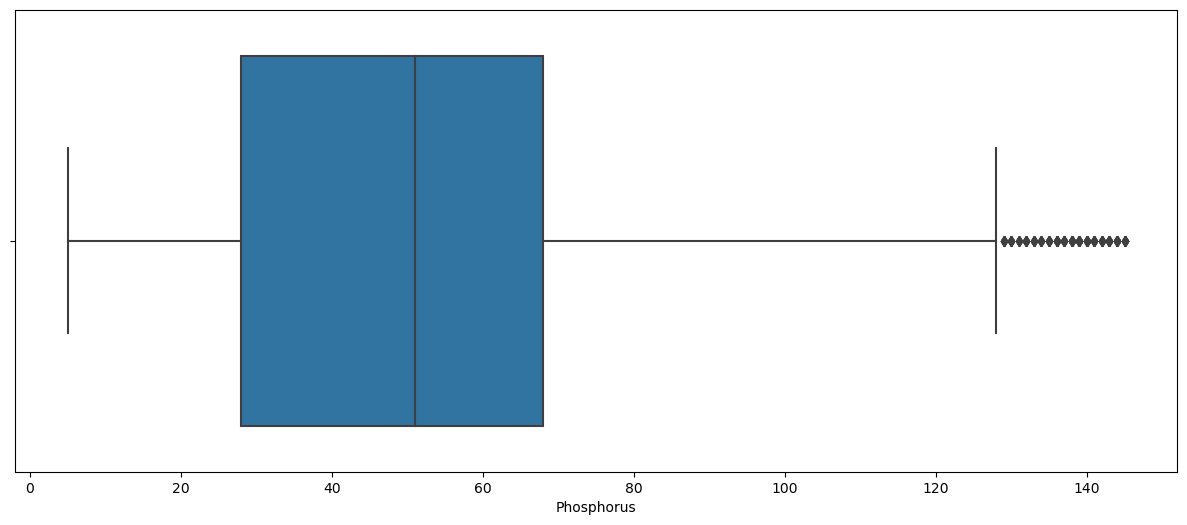

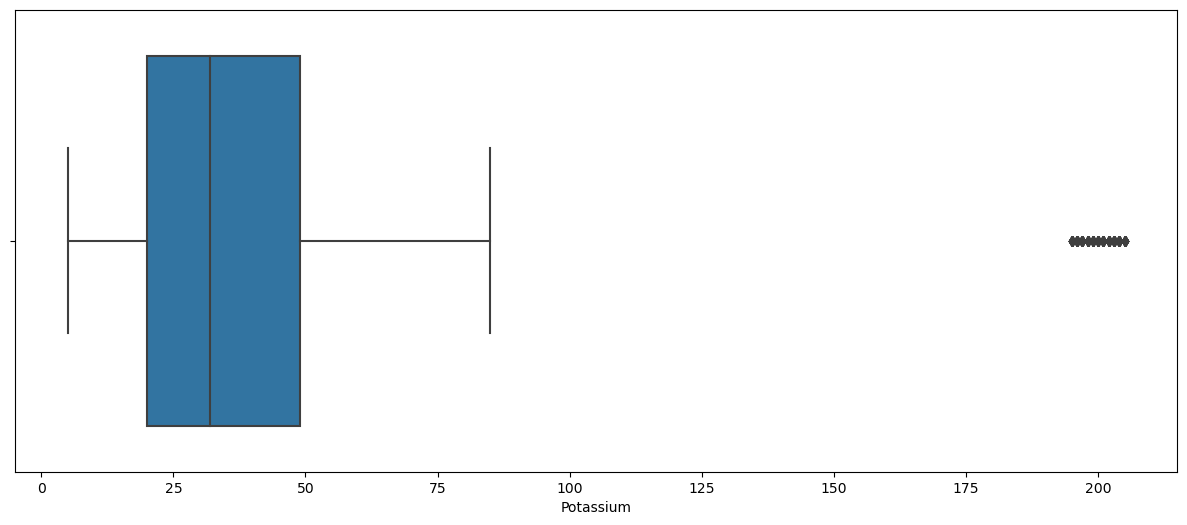

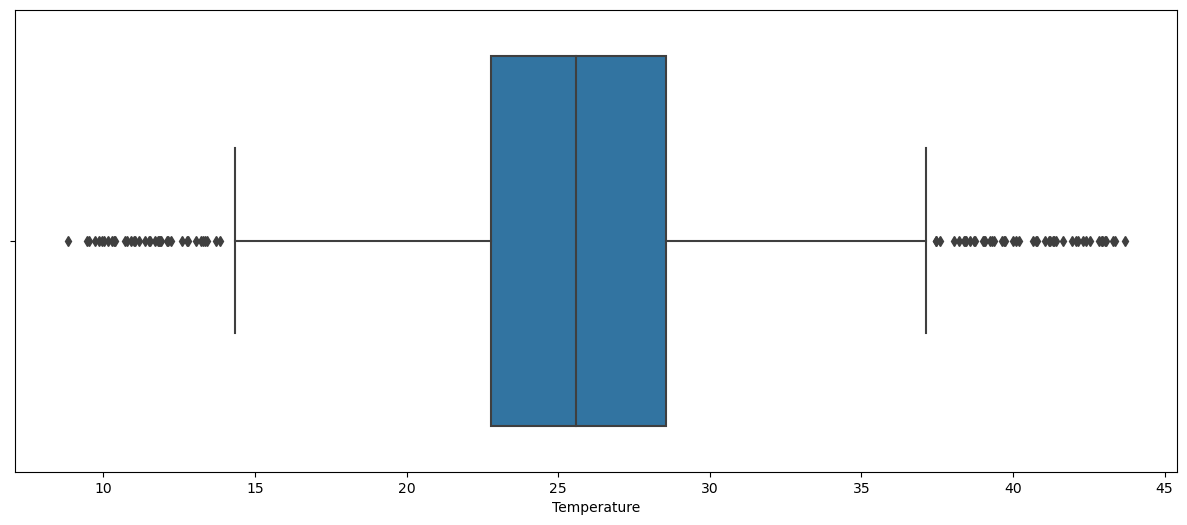

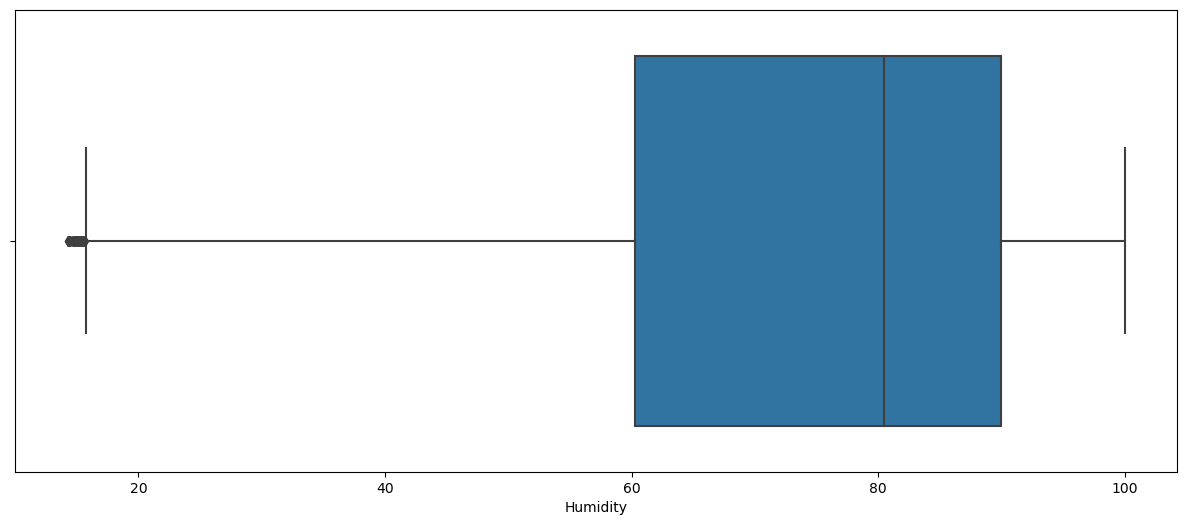

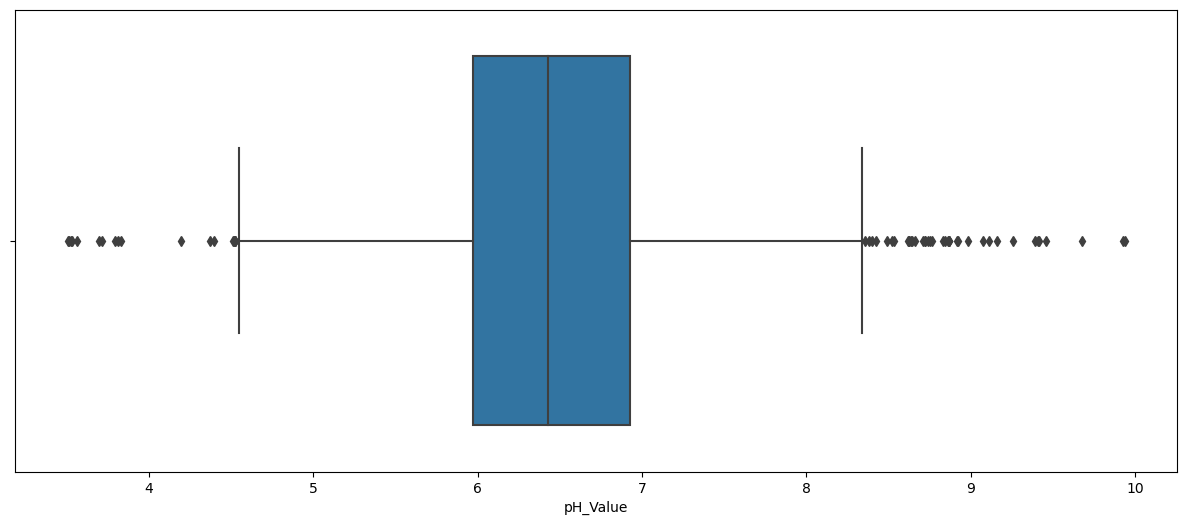

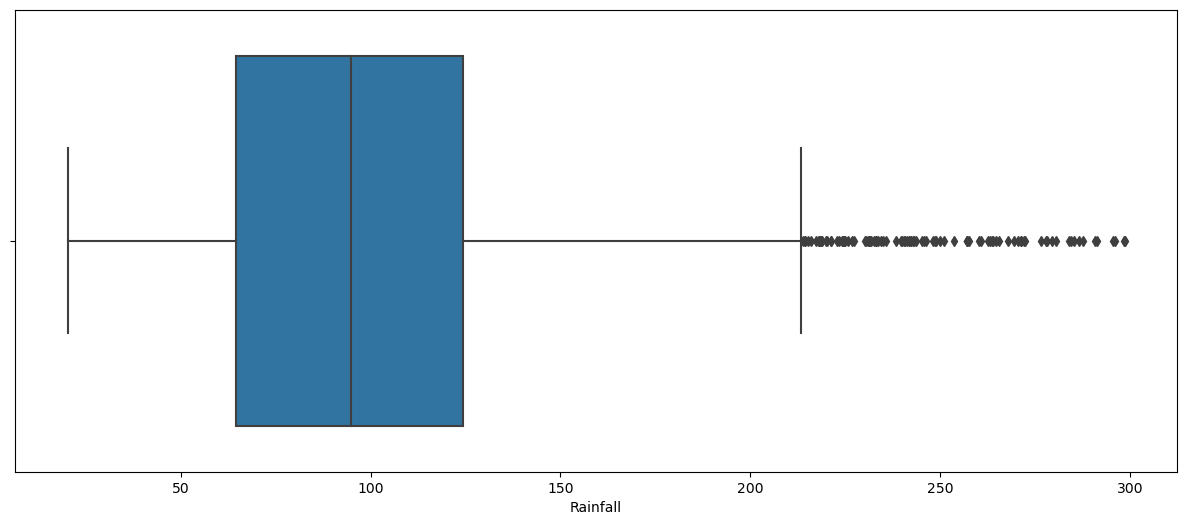

In [17]:
for i in df1.columns:
# starts a loop where i iterates over each column in the dataframe df1. 
# df1.columns returns the column names of df1, and the loop iterates through each of these column names.

    plt.figure(figsize = (15,6))
    # creates a new matplotlib figure with a specific size of 15 inches in width and 6 inches in height. 
    # used to display the box plot for each column.
    
    sns.boxplot(x = df1[i])
    # 'x=' beacuse from version 0.12 of Seaborn, 
    # we should pass the 'x' variable as a keyword argument explicitly, rather than as a positional argument.
    
    # creates a box plot using seaborn for the current column (i) in the loop. 
    # it plots the distribution of values in the column i of the dataframe df1.
    
    plt.show()
    # displays the box plot for the current column i. 
    # After displaying each box plot, the loop continues to the next column until all columns in df1 have been plotted.

BAR PLOT
- A bar plot is a graphical representation of categorical data using bars
- The length of each bar corresponds to the frequency, count, or sum of data within that category. 
- It's commonly used to compare values across categories and display frequency distributions.

Uses:

- Comparison Across Categories: Compare values of a categorical variable across different categories.
- Frequency Distribution: Display how often each category occurs in the dataset.
- Summarize Aggregated Data: Communicate aggregated values such as total sales by region.
- Trend Analysis: Show trends or patterns over time using a time-based categorical variable.
- Compare Subgroups: Use grouped bar plots to compare subgroups within categories.
- Highlight Outliers or Anomalies: Identify unusual patterns or outliers within categorical data.

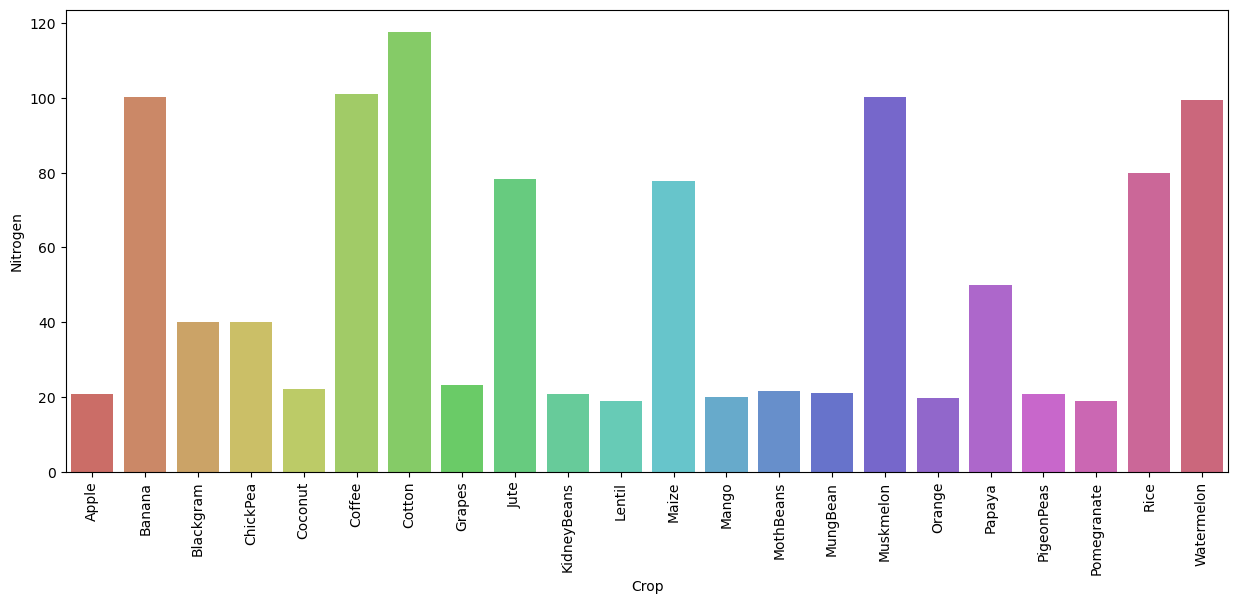

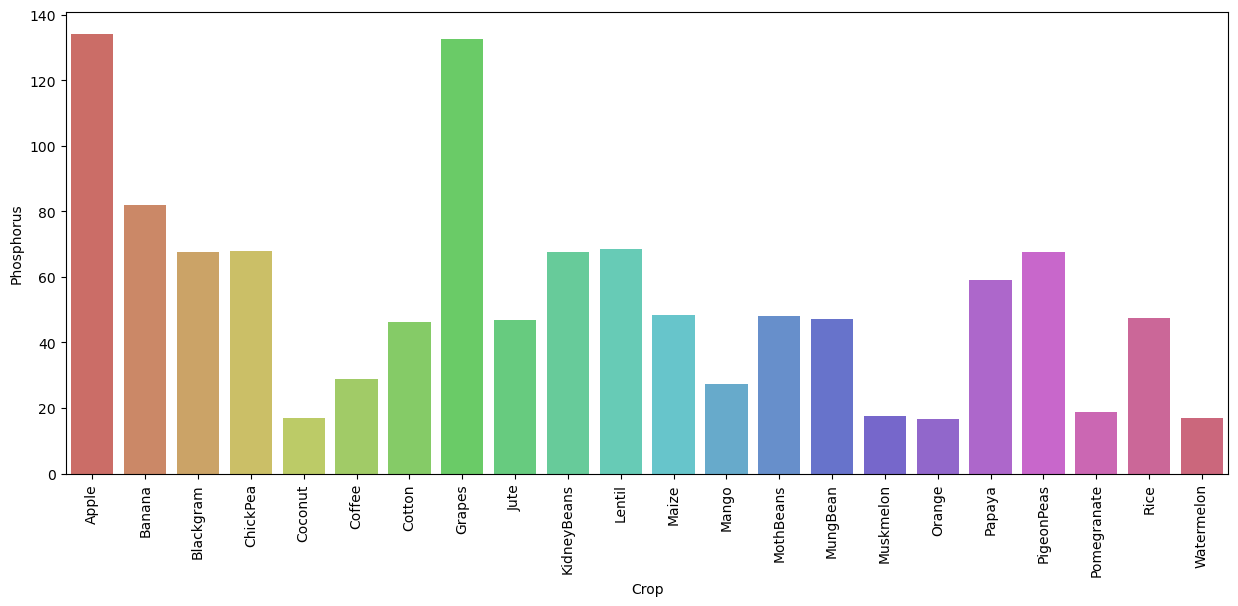

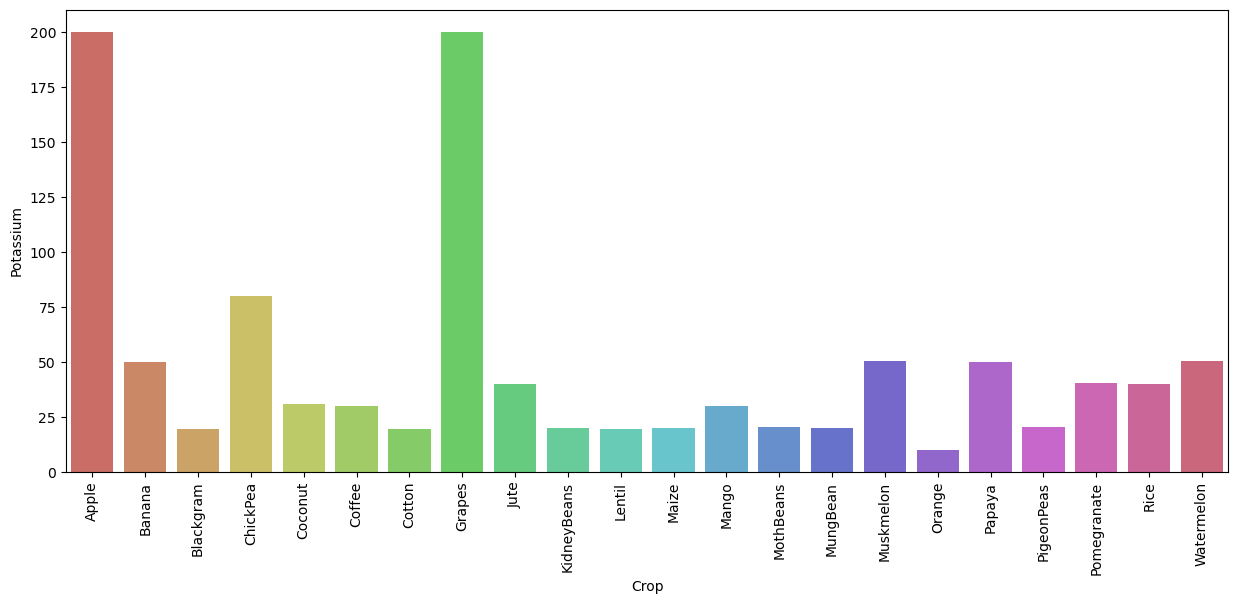

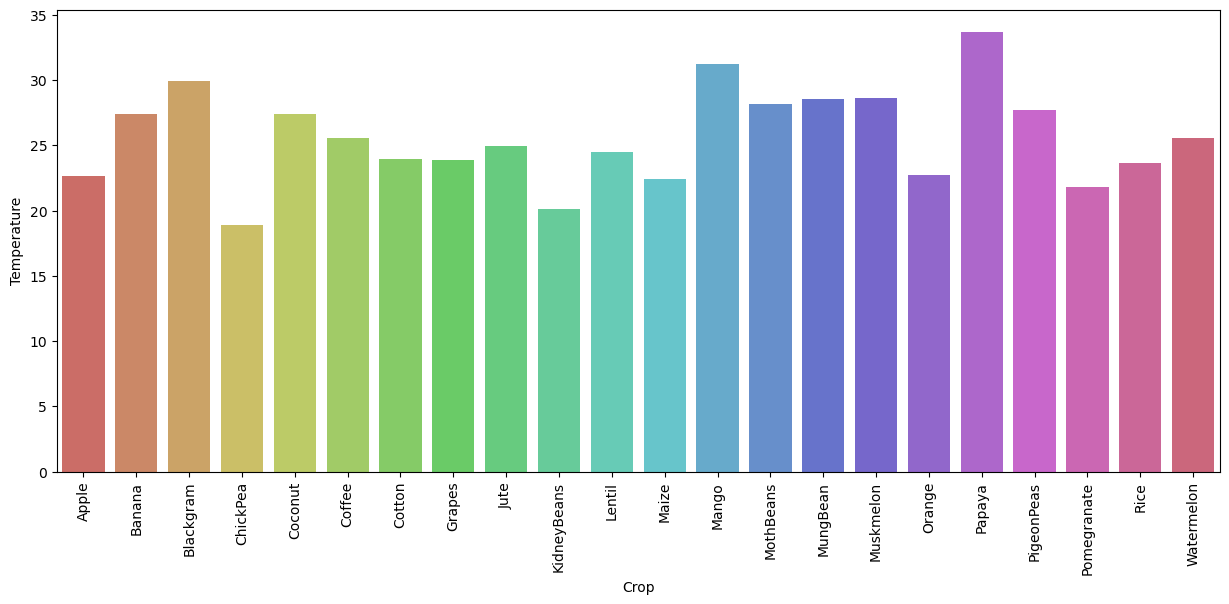

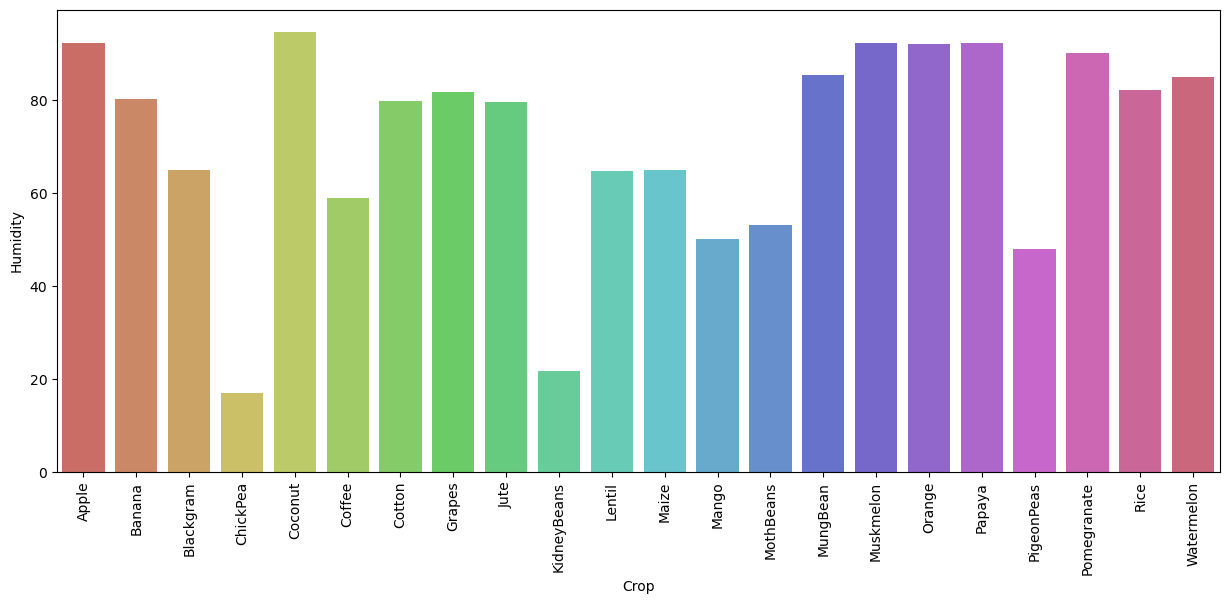

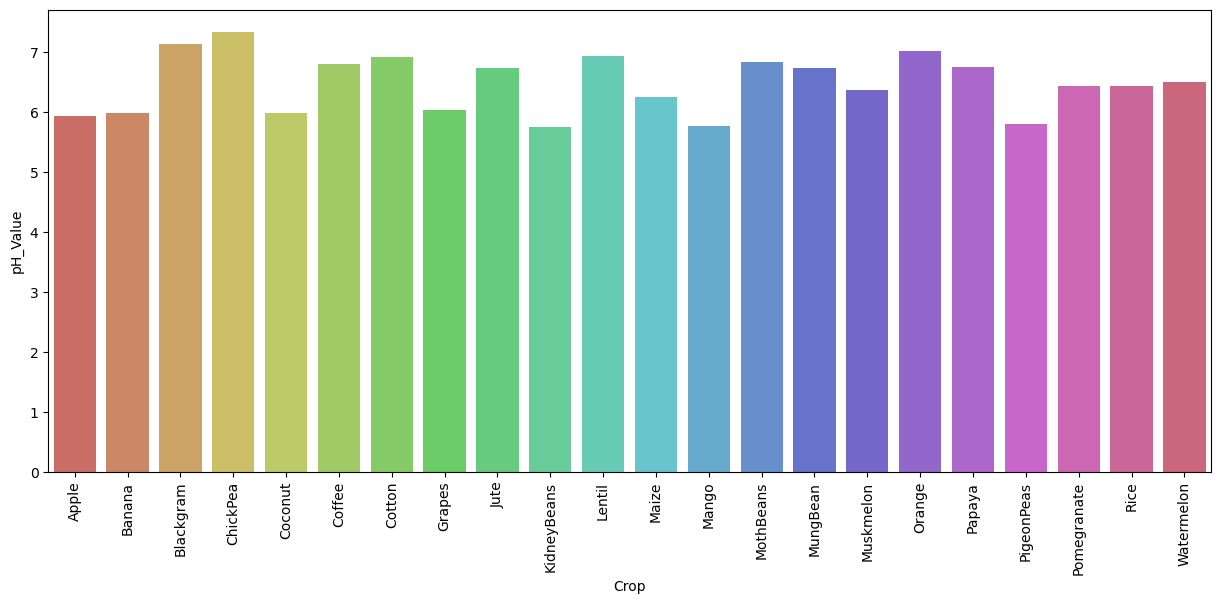

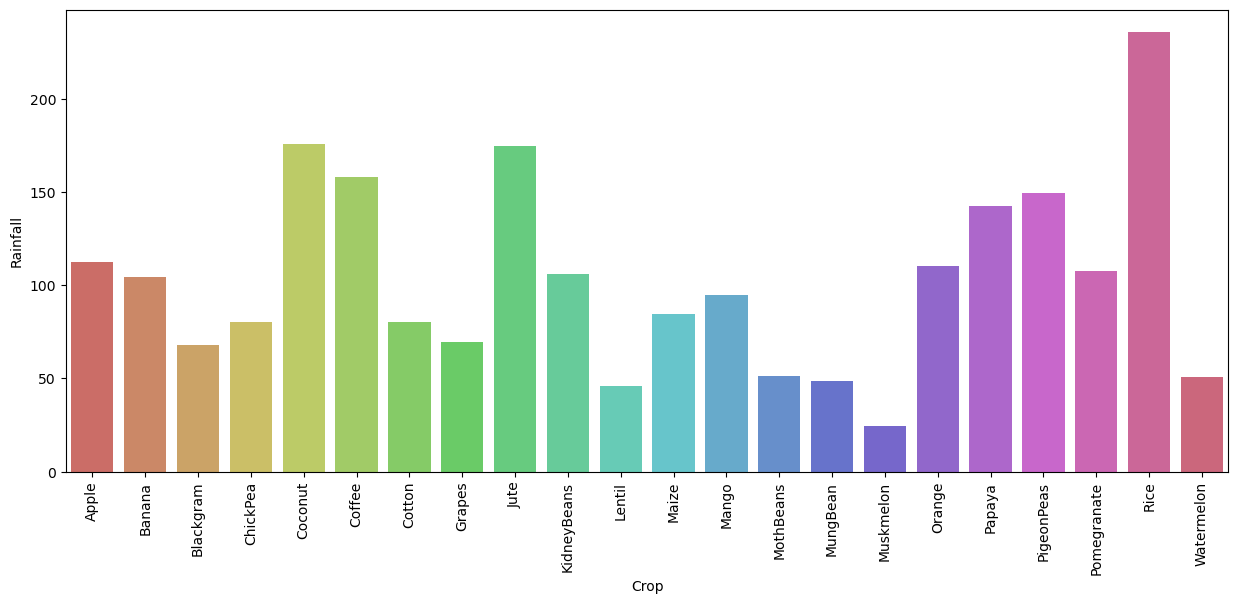

In [18]:
for i in df1.columns:
    # starts a loop where i iterates over each column in the dataframe df1. 
    # df1.columns returns the column names of df1, and the loop iterates through each of these column names.
    
    plt.figure(figsize = (15, 6))
    # creates a new matplotlib figure with a specific size of 15 inches in width and 6 inches in height. 
    # used to display the bar plot for each column.
    
    sns.barplot(x = 'Crop', y = i, data = crop_summary_new, palette = 'hls')
    # creates a bar plot using seaborn for the current column (i) in the loop. 
    # x = 'Crop' specifies the categorical variable on the x-axis (assuming 'Crop' is a column in crop_summary_new).
    # y = i specifies the numerical variable on the y-axis (current column in the loop).
    # data = crop_summary_new specifies the data to be used for plotting.
    # palette = 'hls' sets the color palette for the bars.
    
    plt.xticks(rotation = 90)
    # rotates the x-axis labels by 90 degrees for better readability.
    
    plt.show()
    # displays the bar plot for the current column i. 
    # After displaying each bar plot, the loop continues to the next column until all columns in df1 have been plotted.

CORRELATION
- Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. 
- It ranges from -1 to 1, where:
- 1) 1 indicates a perfect positive linear relationship,
- 2) -1 indicates a perfect negative linear relationship, and
- 3) 0 indicates no linear relationship.

Uses:

- Relationship Assessment: It helps in understanding how changes in one variable are associated with changes in another variable.
- Variable Selection: Identifies variables that are strongly correlated, aiding in feature selection for predictive modeling.
- Data Exploration: Used in exploratory data analysis (EDA) to uncover patterns and dependencies between variables.
- Assumption Testing: In statistical analysis, correlation is used to test assumptions such as independence and multicollinearity.
- Visual Representation: Correlation matrices and scatter plots visually represent relationships, aiding in data interpretation and communication.

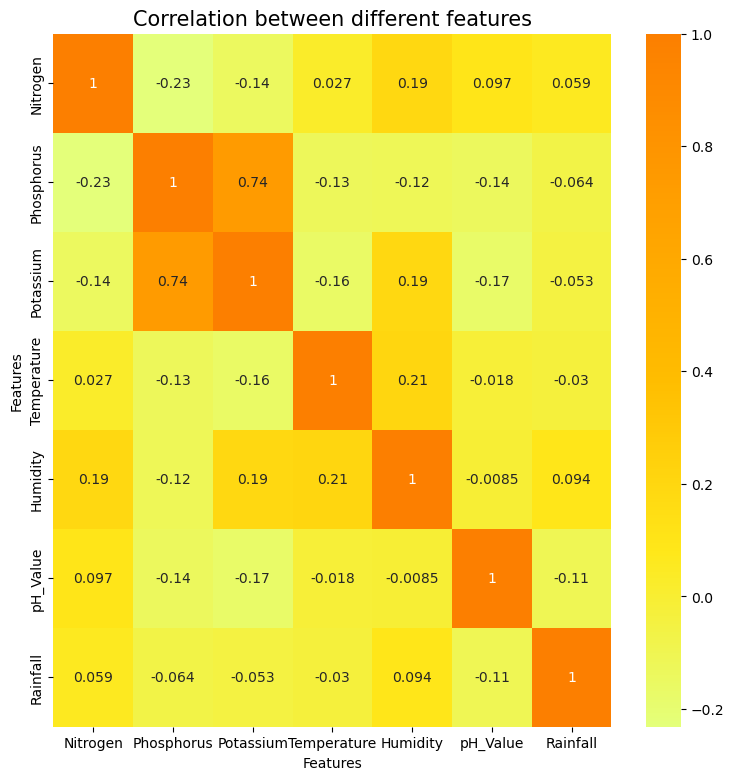

In [19]:
df1.corr()
# calculates the pairwise correlation of columns in the dataframe df1.

fig, ax = plt.subplots(1, 1, figsize = (9,9))
# creates a matplotlib figure (fig) and axis (ax) with a size of 9 inches by 9 inches for the heatmap.

sns.heatmap(df1.corr(), annot = True, cmap = 'Wistia')
# generates a heatmap using Seaborn's heatmap function. 
# It uses the correlation matrix (data.corr()) as the data. 
# The annot=True argument displays the correlation values inside the heatmap cells.
# cmap='Wistia' sets the color scheme to 'Wistia'.

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')
# sets the x-axis and y-axis labels of the heatmap to 'Features'.

plt.title('Correlation between different features', fontsize = 15, c = 'black')
# sets the title of the plot to 'Correlation between different features' with a font size of 15 and black color.

plt.show()
# displays the heatmap plot.

# Data Pre-processing

SKEW
- A skewness value of 0 indicates a symmetric distribution. 
- Positive skewness (skew > 0) means the data is skewed to the right, with a tail extending towards higher values. 
- Negative skewness (skew < 0) indicates a left-skewed distribution, with a tail extending towards lower values.

In [20]:
df.skew()
# calculates the skewness of each numerical column in the dataframe. 
# Skewness measures the asymmetry of the data's distribution.

Nitrogen        0.509721
Phosphorus      1.010773
Potassium       2.375167
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Yield          15.926745
dtype: float64

In [21]:
df['Phosphorus'] = np.log(df['Phosphorus'])

df['Potassium'] = np.log(df['Potassium'])

# For RIGHT skewed.
# Logarithmic transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Yield          15.926745
dtype: float64

In [22]:
df['Humidity'] = (df['Humidity'])** 2

# For LEFT skewed
# Exponential transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -0.522852
pH_Value        0.283929
Rainfall        0.965756
Yield          15.926745
dtype: float64

In [23]:
iq1 = df['Yield'].quantile(0.25)
# Calculates the first quartile (Q1) of the 'Yield' column, which represents the value below which 25% of the data falls.

iq2 = df['Yield'].quantile(0.75)
# Calculates the third quartile (Q3) of the 'Yield' column, which represents the value below which 75% of the data falls.

# second quartile (Q2) is equivalent to the median and is often calculated separately.

print(iq1)

print(iq2)

df['Yield'] = np.where(df['Yield']<iq1,iq1,df['Yield'])
# Replaces values in the 'Yield' column that are below Q1 with Q1.

df['Yield'] = np.where(df['Yield']>iq2,iq2,df['Yield'])
# Replaces values in the 'Yield' column that are above Q3 with Q3.

df.skew()

950.0
3500.0


Nitrogen       0.509721
Phosphorus    -0.782108
Potassium      0.804010
Temperature    0.184933
Humidity      -0.522852
pH_Value       0.283929
Rainfall       0.965756
Yield          0.283069
dtype: float64

CATEGORICAL DATA TO NUMERICAL DATA
- This is a common preprocessing step in machine learning, especially when dealing with categorical data that needs to be converted into a format suitable for model training.

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# creates an instance of the LabelEncoder class, which will be used to transform the categorical values into numerical labels.

df['Crop'] = le.fit_transform(df['Crop'])
# This line applies the label encoding transformation to the 'Crop' column in the dataframe df. 
# The fit_transform() method of LabelEncoder fits the encoder to the unique categories in the 'Crop' column (fit) 
# and then transforms them into numerical labels (transform).

# The LabelEncoder maps each unique categorical value in the 'Crop' column to a corresponding numerical label. 
# For example, if 'Wheat', 'Corn', and 'Rice' are unique crop names in the 'Crop' column, 
# they might be encoded as 0, 1, and 2, respectively.

# Splitting the Dataset into Train Dataset and Test Dataset

In [25]:
X = df.iloc[:,0:8]
# extracts the first 8 columns of the dataframe data using integer-based indexing (iloc). 
# The syntax [:, 0:8] means to select all rows (:) and columns from index 0 up to index 8 (exclusive). 
# These columns represent the features or independent variables.

y = df.iloc[:,8]
# extracts the 9th column (index 8) of the dataframe data using integer-based indexing (iloc). 
# The syntax [:, 8] means to select all rows (:) and only the column at index 8. 
# This column represents your target variable or dependent variable.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# X and y are assumed to be the feature matrix and target variable, respectively.
# test_size = 0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
# shuffle=True (default) indicates that the data will be shuffled before splitting, which helps in randomizing the samples.
# random_state=0 (default: None) sets the random seed for reproducibility ensuring that the same random splits are generated every time.

# After running this code, we will have:

# 1) X_train: The training set of features.
# 2) X_test: The testing set of features.
# 3) y_train: The training set of target values.
# 4) y_test: The testing set of target values.

# BUILDING MODELS

In [27]:
from sklearn.metrics import mean_squared_error

# 1) Linear Regression

WORKING
- 1) Data Storage: Linear Regression stores the coefficients and intercept derived from the training data as its "model."
- 2) Relationship Calculation: It calculates a linear relationship between the input features and the target variable using the coefficients.
- 3) Prediction: Linear Regression predicts the target variable by multiplying the input features with the corresponding coefficients and adding the intercept.
- 4) Working Principle: Linear Regression assumes a linear relationship between the features and the target variable, aiming to minimize the residual sum of squares.

In [28]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
# creates a Linear Regression model object named regressor_lr. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_lr.fit(X_train, y_train)
# trains the Linear Regression model using the input features (X_train) and corresponding target values (y_train).

LinearRegression()

In [29]:
y_pred_lr = regressor_lr.predict(X_test)
# used to make predictions using a trained linear regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_lr.
# Each element of y_pred_lr corresponds to the predicted value for the corresponding row in the test set.

In [30]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
# Calculates the MSE of the predictions made by the linear regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)

Mean Squared Error (MSE) for Linear Regression: 1033830.4702856519


# 2) Decision Tree Regressor

WORKING
- 1) Data Partitioning: Decision Tree Regression partitions the feature space into regions based on feature values.
- 2) Split Selection: It selects optimal feature splits at each node to maximize information gain or minimize impurity (e.g., variance reduction for regression).
- 3) Leaf Node Prediction: Each leaf node in the decision tree predicts the target variable based on the average of training samples falling into that node.
- 4) Working Principle: Decision Tree Regression recursively splits the data based on feature thresholds, creating a tree structure to make predictions.

In [31]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
# creates a Linear Regression model object named regressor_dt. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_dt.fit(X_train, y_train)
# trains the Decision Tree Regression model using the input features (X_train) and corresponding target values (y_train).

DecisionTreeRegressor()

In [32]:
y_pred_dt = regressor_dt.predict(X_test)
# used to make predictions using a trained decision tree regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_dt.
# Each element of y_pred_dt corresponds to the predicted value for the corresponding row in the test set.

In [33]:
mse_dt = mean_squared_error(y_pred_dt, y_test)
# Calculates the MSE of the predictions made by the decision tree regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Decision Tree Regression:", mse_dt)

Mean Squared Error (MSE) for Decision Tree Regression: 1888517.5636363637


# 3) Random Forest Regressor

WORKING
- 1) Ensemble Learning: Random Forest Regression builds multiple decision trees (forest) using random subsets of features and data points.
- 2) Tree Construction: Each decision tree is constructed independently to predict target values.
- 3) Aggregation: Predictions from all trees are aggregated (e.g., averaging for regression) to obtain the final prediction.
- 4) Bootstrap Sampling: Random forest uses bootstrap sampling to create diverse trees and reduce overfitting.

In [34]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
# creates a Random Forest Regression model object named regressor_rf. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_rf.fit(X_train, y_train)
# trains the Random Forest Regression model using the input features (X_train) and corresponding target values (y_train).

RandomForestRegressor()

In [35]:
y_pred_rf = regressor_rf.predict(X_test)
# used to make predictions using a trained random forest regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_rf.
# Each element of y_pred_rf corresponds to the predicted value for the corresponding row in the test set.

In [36]:
mse_rf = mean_squared_error(y_pred_rf, y_test)
# Calculates the MSE of the predictions made by the random forest regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Random Forest Regression:", mse_rf)

Mean Squared Error (MSE) for Random Forest Regression: 1018756.3781152273


# 4) Support Vector Regressor

WORKING
- 1) Hyperplane Creation: SVM Regression finds the optimal hyperplane that best separates data points in feature space while maximizing margin.
- 2) Margin Maximization: It aims to maximize the margin between the hyperplane and the closest data points (support vectors).
- 3) Kernel Trick (Optional): SVM can use kernel functions to transform data into higher-dimensional space for nonlinear separation.
- 4) Regression Prediction: In regression, SVM predicts continuous target values based on the distance of data points from the hyperplane.

In [37]:
from sklearn.svm import SVR

regressor_svr = SVR()
# creates a Support Vector Regression model object named regressor_svr. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_svr.fit(X_train, y_train)
# trains the Support Vector Regression model using the input features (X_train) and corresponding target values (y_train).

SVR()

In [38]:
y_pred_svr = regressor_svr.predict(X_test)
# used to make predictions using a trained support vector regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_svr.
# Each element of y_pred_svr corresponds to the predicted value for the corresponding row in the test set.

In [39]:
mse_svr = mean_squared_error(y_pred_svr, y_test)
# Calculates the MSE of the predictions made by the support vector regressor 
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Support Vector Regression (SVR):", mse_svr)

Mean Squared Error (MSE) for Support Vector Regression (SVR): 1147891.0975545463


# 5) K-Nearest Neighbor Regressor

WORKING
- 1) Data Storage: KNN Regression stores the entire training dataset as its "model" for regression tasks.
- 2) Distance Calculation: It calculates distances (e.g., Euclidean distance) between data points in feature space.
- 3) Neighbor Selection: KNN selects the k nearest neighbors to a new data point based on distance metrics.
- 4) Regression Prediction: For regression, KNN predicts the target value by averaging the target values of its k nearest neighbors.

In [40]:
from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor()
# creates a K-Nearest Neighbor model object named regressor_knn. 
# This object can be trained on data and used to make predictions in regression tasks.

regressor_knn.fit(X_train, y_train)
# trains the K-Nearest Neighbor Regression model using the input features (X_train) and corresponding target values (y_train).

KNeighborsRegressor()

In [41]:
y_pred_knn = regressor_knn.predict(X_test)
# used to make predictions using a trained k-nearest neighbor regressor on a test set (X_test)
# The predicted values for the target variable are stored in the variable y_pred_knn.
# Each element of y_pred_knn corresponds to the predicted value for the corresponding row in the test set.

In [42]:
mse_knn = mean_squared_error(y_pred_knn, y_test)
# Calculates the MSE of the predictions made by the k-nearest neighbor regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression):", mse_knn)

Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression): 1245810.3739090909


# Comparing all the Regressor models

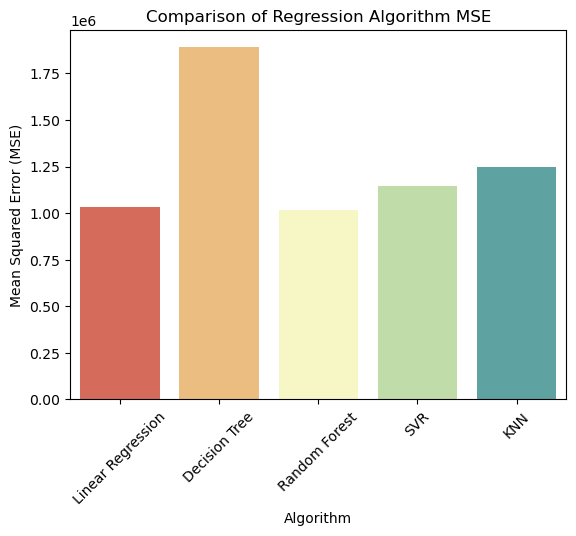

In [43]:
mse_scores = [mse_lr, mse_dt, mse_rf, mse_svr, mse_knn]
# creating a list of mse scores.

algorithm_labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = mse_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Algorithm MSE')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.

plt.show()
# displaying the plot.